# Augustine Tilt Timeseries

In [1]:
import obspy
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import events

matplotlib.rc('pdf', fonttype=42)

plt.style.use("/home/mchristo/proj/libmsc/style/msc.mplstyle")

## Download data with pysep and estimate tilt

In [3]:
#!pysep -o -c ./data/augustine2006_1to2.yaml
#!pysep -o -c ./data/augustine2006_3to8.yaml
#!pysep -o -c ./augustine2006_9.yaml
#!pysep -c -c ./augustine2006_10to13.yaml

#!mv *SOUTHERN* data/seis

In [3]:
#!seinei -v -a -f 2 -pbl 43200 -pbs 120 ./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/inv.xml ./data/seis/*SOUTHERN*/SAC/20*.sac

Reading inventory file:
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/inv.xml
Reading SAC file(s):
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU11..HHE.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU11..HHN.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU12..HHE.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU12..HHN.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU13..HHE.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU13..HHN.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU14..HHE.sac
	./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/2006-01-11T140000_SOUTHERN_ALASKA.AV.AU14..HHN.sac
	./data/seis/2006-01-14T000000_SOUTHERN_ALASKA/SAC/2006-01-14T000000_SOUTHERN_ALASKA

## Load data and plot

In [2]:
st0 = obspy.read("./data/seis/2006-01-11T140000_SOUTHERN_ALASKA/SAC/tilt*.sac")
st1 = obspy.read("./data/seis/2006-01-14T000000_SOUTHERN_ALASKA/SAC/tilt*.sac")

In [3]:
events = events.get_events()

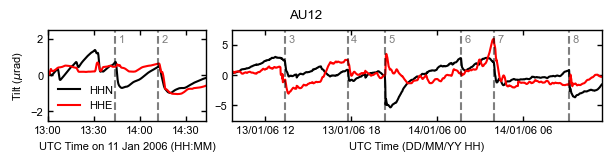

In [27]:
fig = plt.figure(figsize=(6, 1.5), constrained_layout=True)
gs = matplotlib.gridspec.GridSpec(1, 10, figure=fig)

sta = "AU12"

# Events 1-2
ax1 = fig.add_subplot(gs[0,:3])
st0_sub = st0.select(station=sta)
trn = st0_sub.select(channel="HHN")[0]
ax1.plot(trn.times("matplotlib"), trn.data*1e6, "k-", label="HHN")

tre = st0_sub.select(channel="HHE")[0]
ax1.plot(tre.times("matplotlib"), tre.data*1e6, "r-", label="HHE")

for i, event in enumerate(events):
    ax1.axvline(event.matplotlib_date, linestyle="--", alpha=0.5)
    ax1.annotate("%d" % (i+1), (event.matplotlib_date+1.5e-3, 1.8), ha="left", alpha=0.5)
ax1.grid(False)

ax1.set_xlim(trn.times("matplotlib")[0], trn.times("matplotlib")[-1000])

ax1.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(byminute=[0, 30]))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

ax1.set_ylim(-2.5, 2.5)

ax1.set_xlabel("UTC Time on 11 Jan 2006 (HH:MM)", fontsize=8)

alabel = ax1.annotate(
    "a",
    (.05,.89),
    xycoords="axes fraction",
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1')
)

ax1.legend(loc="lower left", frameon=False)

ax1.set_ylabel("Tilt ($\\mu$rad)")


# Events 3-8
ax2 = fig.add_subplot(gs[0,3:])
st1_sub = st1.select(station=sta)
trn = st1_sub.select(channel="HHN")[0]
ax2.plot(trn.times("matplotlib"), trn.data*1e6, "k-", label="HHN")

tre = st1_sub.select(channel="HHE")[0]
ax2.plot(tre.times("matplotlib"), tre.data*1e6, "r-", label="HHE")

for i, event in enumerate(events):
    ax2.axvline(event.matplotlib_date, linestyle="--", alpha=0.5)
    ax2.annotate("%d" % (i+1), (event.matplotlib_date+1e-2, 5.4), ha="left", alpha=0.5)

ax2.grid(False)

ax2.set_xlim(trn.times("matplotlib")[35000], trn.times("matplotlib")[-45000])

ax2.xaxis.set_major_locator(matplotlib.dates.HourLocator(byhour=[0, 6, 12, 18]))
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d/%m/%y %H"))\

ax2.set_ylim(-7.5, 7.5)

ax2.set_xlabel("UTC Time (DD/MM/YY HH)")

blabel = ax2.annotate(
    "b",
    (.025,.875),
    xycoords="axes fraction",
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1')
)


fig.savefig("figs/augustine_timeseries.pdf", bbox_inches="tight")

alabel.remove()
blabel.remove()
fig.suptitle("AU12")

fig.savefig("figs/png/augustine_timeseries.png", dpi=300, bbox_inches="tight")